<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/8.a.%20Generative%20Adversarial%20Networks%20(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

شبکه‌های GAN (Generative Adversarial Networks)

🧠 ایده اصلی GAN

یک GAN از دو شبکه عصبی تشکیل شده است که با هم رقابت می‌کنند:

Generator (تولیدکننده)

وظیفه‌اش تولید داده‌ی جعلی اما شبیه داده واقعی است.

مثال: تولید تصویر دست‌نویس شبیه MNIST یا تصویر مصنوعی رادیولوژی.

Discriminator (تشخیص‌دهنده)

وظیفه‌اش تشخیص واقعی یا جعلی بودن داده‌ها است.

مثال: تشخیص اینکه تصویر واقعی است یا توسط Generator ساخته شده.

🔄 روند کار GAN

می‌توان آن را مثل یک بازی فریب و تشخیص تصور کرد:

Generator سعی می‌کند تصاویر جعلی بسازد که واقعی به نظر برسند.

Discriminator سعی می‌کند این تصاویر جعلی را شناسایی کند.

با گذشت زمان:

Generator بهتر می‌شود و تصاویر واقع‌گرایانه‌تری تولید می‌کند.

Discriminator هم بهتر می‌شود و تصاویر جعلی را دقیق‌تر تشخیص می‌دهد.

📦 تشبیه ساده

تصور کن:

Generator = یک نقاش تازه‌کار که سعی می‌کند پول واقعی بسازد.

Discriminator = یک کارمند بانک که تلاش می‌کند اسکناس تقلبی را تشخیص دهد.

هر بار نقاش بهتر می‌شود و اسکناس واقعی‌تر می‌کشد، و کارمند بانک هم مهارتش بیشتر می‌شود.

نتیجه → نقاش می‌تواند اسکناس‌های بسیار واقعی بسازد که کارمند بانک حتی در نگاه اول هم نمی‌تواند تشخیص دهد.

✨ کاربردهای GAN

تصاویر → تولید تصاویر واقعی، افزایش داده (Data Augmentation)

پزشکی → تولید تصاویر پزشکی مانند MRI یا X-ray برای آموزش مدل‌ها

صدا و موسیقی → تولید موسیقی یا گفتار مصنوعی

ویدئو → افزایش کیفیت ویدئو، تبدیل سبک‌ها

متن و NLP → تولید متن مصنوعی، چت‌بات‌های هوشمند

📌 خلاصه در یک جمله

GAN یعنی دو شبکه عصبی که با هم رقابت می‌کنند: یکی تولید می‌کند و دیگری تشخیص می‌دهد، تا در نهایت شبکه تولیدکننده تصاویر یا داده‌های بسیار واقعی بسازد.

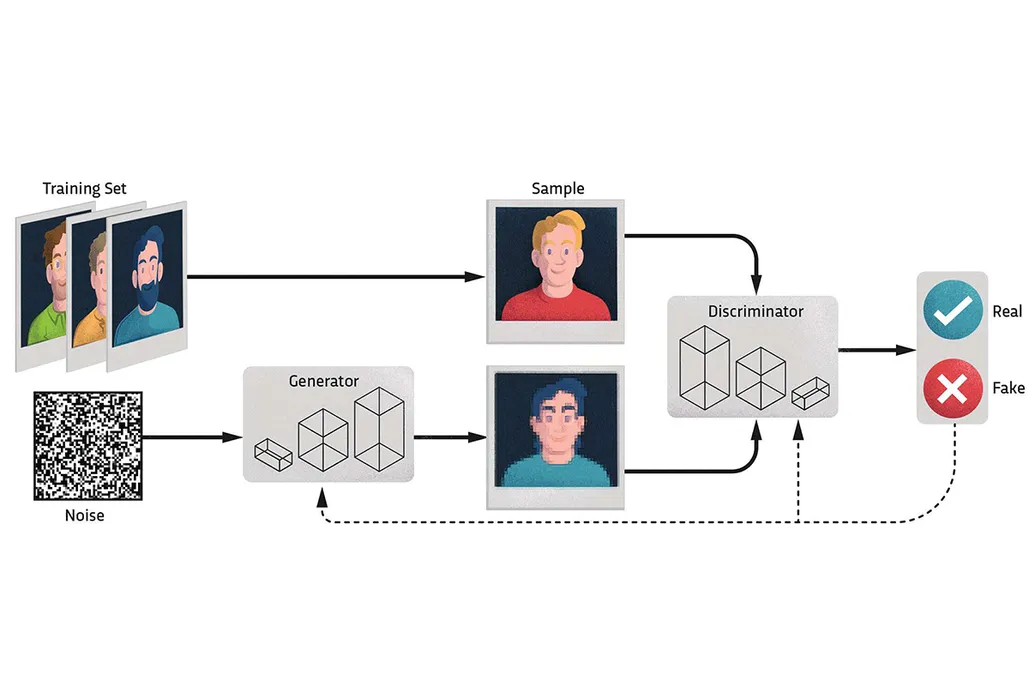

<div dir="rtl" align="right">

مثال:

از دیتاست MNIST (تصاویر دست‌نویس اعداد ۰ تا ۹) برای تولید تصاویر مصنوعی استفاده کنیم.

0 [D loss: 0.8688, acc: 22.27%] [G loss: 0.6943]


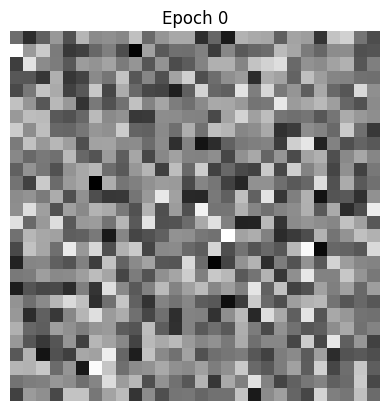

2000 [D loss: 6.4972, acc: 9.68%] [G loss: 0.0011]


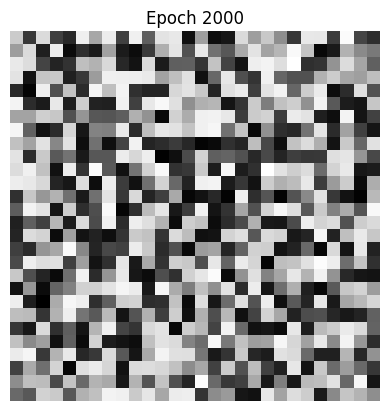

4000 [D loss: 7.1397, acc: 9.77%] [G loss: 0.0006]


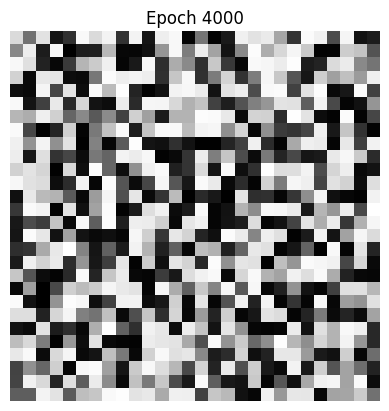

6000 [D loss: 7.5475, acc: 9.80%] [G loss: 0.0004]


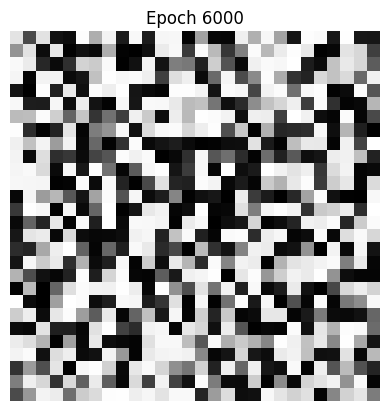

8000 [D loss: 7.8621, acc: 9.82%] [G loss: 0.0003]


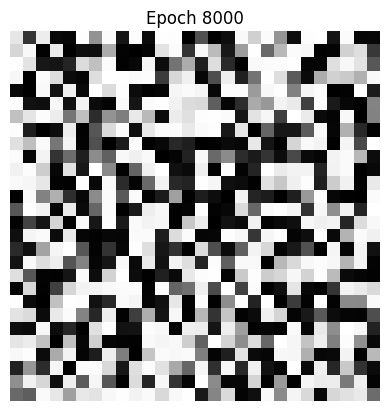

In [8]:
# 1. وارد کردن کتابخانه‌های مورد نیاز
import numpy as np                      # برای محاسبات عددی
import matplotlib.pyplot as plt         # برای رسم تصاویر
from keras.datasets import mnist        # دیتاست MNIST (اعداد دست‌نویس)
from keras.models import Sequential, Model  # مدل‌های ساده و ترکیبی
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input  # لایه‌ها
from keras.optimizers import Adam       # بهینه‌ساز

# 2. بارگذاری دیتاست MNIST
(X_train, _), (_, _) = mnist.load_data()        # فقط داده‌های آموزش، برچسب‌ها را استفاده نمی‌کنیم
X_train = X_train / 127.5 - 1.0                # نرمال‌سازی: مقیاس -1 تا 1
X_train = X_train.reshape(-1, 28*28)           # تبدیل تصاویر 28x28 به بردار 784 بعدی

# 3. تنظیم پارامترها
latent_dim = 100                               # طول بردار نویز برای Generator
adam = Adam(learning_rate=0.0002, beta_1=0.5) # بهینه‌ساز Adam

# 4. ساخت Generator (تولیدکننده تصاویر)
generator = Sequential([
    Dense(256, input_dim=latent_dim),  # لایه متراکم 256 نورون، ورودی بردار نویز
    LeakyReLU(0.2),                    # فعال‌سازی LeakyReLU برای جلوگیری از مردن نورون‌ها
    Dense(512),                         # لایه بعدی با 512 نورون
    LeakyReLU(0.2),
    Dense(1024),
    LeakyReLU(0.2),
    Dense(28*28, activation='tanh'),   # خروجی 784 بعدی (تصویر) با مقیاس -1 تا 1
    Reshape((28,28))                   # تبدیل بردار به تصویر 28x28
])

# 5. ساخت Discriminator (تشخیص‌دهنده تصاویر واقعی/جعلی)
discriminator = Sequential([
    Flatten(input_shape=(28,28)),  # تصاویر را به بردار 784 بعدی تبدیل می‌کنیم
    Dense(512),
    LeakyReLU(0.2),
    Dense(256),
    LeakyReLU(0.2),
    Dense(1, activation='sigmoid') # خروجی بین 0 تا 1: 1=واقعی، 0=جعلی
])
discriminator.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 6. ساخت GAN ترکیبی (Generator + Discriminator)
discriminator.trainable = False             # وقتی GAN را آموزش می‌دهیم، Discriminator ثابت می‌ماند
z = Input(shape=(latent_dim,))              # ورودی: بردار نویز
img = generator(z)                          # Generator تصویر تولید می‌کند
valid = discriminator(img)                  # Discriminator تشخیص می‌دهد واقعی است یا جعلی
gan = Model(z, valid)                       # ساخت مدل GAN ترکیبی
gan.compile(optimizer=adam, loss='binary_crossentropy')

# 7. آموزش GAN
epochs = 10000          # تعداد تکرارها
batch_size = 64         # تعداد نمونه در هر دسته
sample_interval = 2000  # هر چند اپوک تصویر نمونه نشان داده شود

for epoch in range(epochs):
    # 7a. آموزش Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)   # انتخاب تصادفی تصاویر واقعی
    real_imgs = X_train[idx].reshape(batch_size,28,28)        # آماده‌سازی برای Discriminator
    noise = np.random.normal(0,1,(batch_size, latent_dim))    # ایجاد نویز برای Generator
    fake_imgs = generator.predict(noise, verbose=0)           # تولید تصاویر جعلی
    # آموزش روی تصاویر واقعی و جعلی
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size,1)))  # واقعی=1
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size,1))) # جعلی=0
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # میانگین خطا

    # 7b. آموزش Generator
    noise = np.random.normal(0,1,(batch_size, latent_dim))    # نویز جدید
    g_loss = gan.train_on_batch(noise, np.ones((batch_size,1))) # Generator سعی می‌کند Discriminator را فریب دهد

    # 7c. نمایش پیشرفت و نمونه تصویر
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc: {d_loss[1]*100:.2f}%] [G loss: {g_loss:.4f}]")
        sample_img = generator.predict(np.random.normal(0,1,(1,latent_dim)), verbose=0)
        plt.imshow(sample_img[0], cmap='gray')
        plt.title(f'Epoch {epoch}')
        plt.axis('off')
        plt.show()


<div dir="rtl" align="right">

🔹 توضیح کلی

Generator → از نویز یک تصویر MNIST شبیه‌سازی می‌کند.

Discriminator → می‌گوید تصویر واقعی است یا جعلی.

آموزش Discriminator → یاد می‌گیرد واقعی/جعلی را تشخیص دهد.

آموزش Generator → یاد می‌گیرد Discriminator را فریب دهد.

در پایان → Generator تصاویر بسیار شبیه MNIST تولید می‌کند.